In [4]:
import warnings
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


### Data Set 

Dataset Identifier: n8mc-b4w4,
Total Rows: 21950114,
Source Domain: data.cdc.gov,
Created: 2/3/2021, 8:17:22 AM,
Last Updated: 3/22/2021, 1:52:38 PM,
Category: Case Surveillance,
Attribution: CDC Case Surveillance Task Force,
License: Public Domain U.S. Government,
Owner: Data.CDC.gov Administrator,
Endpoint Version: 2.1,

In [6]:
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("n8mc-b4w4",limit=2000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [7]:
# view the original data pull. 2M lines and 9 columns 
results_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,case_onset_interval,underlying_conditions_yn,case_positive_specimen
0,2020-01,NA,NA,NA,NA,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,NaN,NaN,NaN
1,2020-01,NA,NA,NA,NA,NA,NA,NA,NA,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,NaN,NaN,NaN
2,2020-01,NA,NA,NA,NA,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,NaN,NaN,NaN
3,2020-01,NA,NA,NA,NA,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN,NaN,NaN
4,2020-01,NA,NA,NA,NA,NA,NA,NA,NA,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2021-01,PA,42,WASHINGTON,42125,18 to 49 years,Female,Unknown,Unknown,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,Unknown,NaN,NaN,0
1999996,2021-01,PA,42,WASHINGTON,42125,18 to 49 years,Female,Unknown,Unknown,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,Unknown,NaN,NaN,0
1999997,2021-01,PA,42,WASHINGTON,42125,18 to 49 years,Female,Unknown,Unknown,Missing,Missing,Probable Case,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN
1999998,2021-01,PA,42,WASHINGTON,42125,18 to 49 years,Female,Unknown,Unknown,Missing,Missing,Probable Case,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN


In [8]:
# Select only the required columns, removed the case_month also as it is not significant for the analysis
df=results_df[['case_month','res_state','age_group','sex','death_yn']]
df

,case_month,res_state,age_group,sex,death_yn
0,2020-01,NA,NA,NA,Missing
1,2020-01,NA,NA,NA,Missing
2,2020-01,NA,NA,NA,Missing
3,2020-01,NA,NA,NA,Missing
4,2020-01,NA,NA,NA,Missing
...,...,...,...,...,...
1999995,2021-01,PA,18 to 49 years,Female,Unknown
1999996,2021-01,PA,18 to 49 years,Female,Unknown
1999997,2021-01,PA,18 to 49 years,Female,Unknown
1999998,2021-01,PA,18 to 49 years,Female,Unknown


In [9]:
# Drop null values if there is any
df.dropna()

,case_month,res_state,age_group,sex,death_yn
0,2020-01,NA,NA,NA,Missing
1,2020-01,NA,NA,NA,Missing
2,2020-01,NA,NA,NA,Missing
3,2020-01,NA,NA,NA,Missing
4,2020-01,NA,NA,NA,Missing
...,...,...,...,...,...
1999995,2021-01,PA,18 to 49 years,Female,Unknown
1999996,2021-01,PA,18 to 49 years,Female,Unknown
1999997,2021-01,PA,18 to 49 years,Female,Unknown
1999998,2021-01,PA,18 to 49 years,Female,Unknown


In [11]:
# To limit the analysis 2020, drop any data belong to 2021.And view the data details. 
# (2,000,000-1,497,688=502,312 records belonged to 2021)
clean_df=df.loc[df['case_month']<='2020-12']
clean_df.describe()

,case_month,res_state,age_group,sex,death_yn
count,1497688,1497688,1497688,1497688,1497688
unique,12,55,6,5,5
top,2020-12,CA,18 to 49 years,Female,No
freq,441754,280039,850422,820223,767739


In [13]:
clean_df

,case_month,res_state,age_group,sex,death_yn
0,2020-01,NA,NA,NA,Missing
1,2020-01,NA,NA,NA,Missing
2,2020-01,NA,NA,NA,Missing
3,2020-01,NA,NA,NA,Missing
4,2020-01,NA,NA,NA,Missing
...,...,...,...,...,...
1999930,2020-07,PA,18 to 49 years,Female,No
1999931,2020-07,PA,18 to 49 years,Female,No
1999932,2020-07,PA,18 to 49 years,Female,No
1999933,2020-07,PA,18 to 49 years,Female,No


In [14]:
clean_df.res_state.dtype

dtype('O')

In [15]:
#change the data type of state to string
clean_df['res_state'].astype('string')

0          NA
1          NA
2          NA
3          NA
4          NA
           ..
1999930    PA
1999931    PA
1999932    PA
1999933    PA
1999934    PA
Name: res_state, Length: 1497688, dtype: string

In [16]:
# see how many rows have NA values for states
indexNames=clean_df[clean_df['res_state']=='NA'].index
print(indexNames)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53],
           dtype='int64')


In [17]:
# view and verify
#clean_df.head(60)

In [18]:
#get a copy of the df
new_clean_df=clean_df


In [19]:
# since its only 53 rows have missing state data, dropping the records
new_clean_df.drop(new_clean_df[new_clean_df['res_state']=='NA'].index, inplace=True)
new_clean_df

C:\Users\nishi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,case_month,res_state,age_group,sex,death_yn
54,2020-04,AK,NA,NA,No
55,2020-04,AK,NA,NA,No
56,2020-04,AK,NA,NA,No
57,2020-04,AK,NA,NA,No
58,2020-04,AK,NA,NA,No
...,...,...,...,...,...
1999930,2020-07,PA,18 to 49 years,Female,No
1999931,2020-07,PA,18 to 49 years,Female,No
1999932,2020-07,PA,18 to 49 years,Female,No
1999933,2020-07,PA,18 to 49 years,Female,No


In [30]:
#df1=new_clean_df

In [1]:
#df1.drop(df1[df1['res_county']=='NA'].index, inplace=True)
#df1.head()

In [245]:
#df2=df1

In [31]:
df1=new_clean_df.replace('Unknown','Missing')

In [32]:
df2=df1.replace('NA','Missing')

In [33]:
df2['age_group'].value_counts()

18 to 49 years    850422
50 to 64 years    266527
65+ years         179216
0 - 17 years      161001
Missing            40468
Name: age_group, dtype: int64

In [34]:
df2['sex'].value_counts()

Female     820223
Male       581179
Missing     96232
Name: sex, dtype: int64

In [67]:
#new_clean_df['res_state'].value_counts()

### Analyzing the Cases by Age Groups

In [36]:
age_data=df2[['res_state','age_group']]
age_data

,res_state,age_group
54,AK,Missing
55,AK,Missing
56,AK,Missing
57,AK,Missing
58,AK,Missing
...,...,...
1999930,PA,18 to 49 years
1999931,PA,18 to 49 years
1999932,PA,18 to 49 years
1999933,PA,18 to 49 years


In [37]:
sum_age_data=age_data.groupby(['age_group']).count()

In [38]:
all_age=sum_age_data.rename(columns={'res_state':'Count_of_Cases_USA'})

In [39]:
CA_age_data=age_data.loc[age_data['res_state']=='CA']
CA_age_data

,res_state,age_group
618,CA,Missing
619,CA,Missing
620,CA,Missing
621,CA,Missing
622,CA,Missing
...,...,...
1990414,CA,18 to 49 years
1990415,CA,18 to 49 years
1990416,CA,18 to 49 years
1990417,CA,18 to 49 years


In [40]:
CA_sum_age_data=CA_age_data.groupby(['age_group']).count()
CA_sum_age_data

,res_state
age_group,
0 - 17 years,32746
18 to 49 years,189621
50 to 64 years,38451
65+ years,18411
Missing,810


In [41]:
CA_age=CA_sum_age_data.rename(columns={'res_state':'Count_of_Cases_CA'})

In [42]:
NY_age_data=age_data.loc[age_data['res_state']=='NY']


In [43]:
NY_sum_age_data=NY_age_data.groupby(['age_group']).count()


In [44]:
NY_age=NY_sum_age_data.rename(columns={'res_state':'Count_of_Cases_NY'})

In [45]:
FL_age_data=age_data.loc[age_data['res_state']=='FL']


In [46]:
FL_sum_age_data=FL_age_data.groupby(['age_group']).count()


In [47]:
FL_age=FL_sum_age_data.rename(columns={'res_state':'Count_of_Cases_FL'})

In [48]:
IL_age_data=age_data.loc[age_data['res_state']=='IL']


In [49]:
IL_sum_age_data=IL_age_data.groupby(['age_group']).count()


In [50]:
IL_age=IL_sum_age_data.rename(columns={'res_state':'Count_of_Cases_IL'})

In [51]:
PA_age_data=age_data.loc[age_data['res_state']=='PA']


In [52]:
PA_sum_age_data=PA_age_data.groupby(['age_group']).count()


In [53]:
PA_age=PA_sum_age_data.rename(columns={'res_state':'Count_of_Cases_PA'})

In [54]:
age_merge1=pd.merge(all_age,CA_age,on='age_group',how='inner')


In [55]:
age_merge2=pd.merge(NY_age,FL_age,on='age_group',how='inner')


In [56]:
age_merge3=pd.merge(PA_age,IL_age,on='age_group',how='inner')


In [62]:
age_merge4=pd.merge(age_merge1,age_merge2, on='age_group',how='inner')
age_summary=pd.merge(age_merge4,age_merge3, on='age_group', how='inner')
age_summary.reset_index(level=0, inplace=True)
age_summary

,age_group,Count_of_Cases_USA,Count_of_Cases_CA,Count_of_Cases_NY,Count_of_Cases_FL,Count_of_Cases_PA,Count_of_Cases_IL
0,0 - 17 years,161001,32746,11494,6730,4653,9395
1,18 to 49 years,850422,189621,57205,49049,32524,56944
2,50 to 64 years,266527,38451,23602,15327,12430,18193
3,65+ years,179216,18411,16656,10793,11227,9988
4,Missing,40468,810,1584,888,1180,1054


In [64]:
# missing values are significanly low. So the data is dropped.
age_summary_data=age_summary.drop(index=4)
age_summary_data

,age_group,Count_of_Cases_USA,Count_of_Cases_CA,Count_of_Cases_NY,Count_of_Cases_FL,Count_of_Cases_PA,Count_of_Cases_IL
0,0 - 17 years,161001,32746,11494,6730,4653,9395
1,18 to 49 years,850422,189621,57205,49049,32524,56944
2,50 to 64 years,266527,38451,23602,15327,12430,18193
3,65+ years,179216,18411,16656,10793,11227,9988


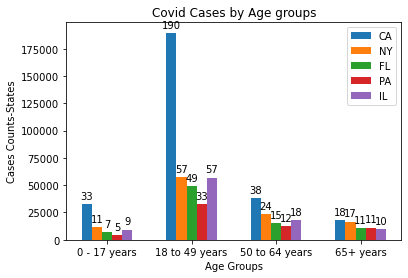

In [65]:
labels =age_summary_data['age_group']
CA =age_summary_data['Count_of_Cases_CA']
NY=age_summary_data['Count_of_Cases_NY']
FL=age_summary_data['Count_of_Cases_FL']
PA=age_summary_data['Count_of_Cases_PA']
IL=age_summary_data['Count_of_Cases_IL']

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x , CA, width, label='CA')
rects2 = ax.bar(x+ width, NY, width, label='NY')
rects3 = ax.bar(x + width*2, FL, width, label='FL')
rects4 = ax.bar(x + width*3, PA, width, label='PA')
rects5 = ax.bar(x + width*4, IL, width, label='IL')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases Counts-States')
ax.set_xlabel('Age Groups')
ax.set_title('Covid Cases by Age groups')
ax.set_xticks(x+width*2)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ht=(round(height/1000))
        ax.annotate('{}'.format(ht),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)


#fig.tight_layout()

plt.show()

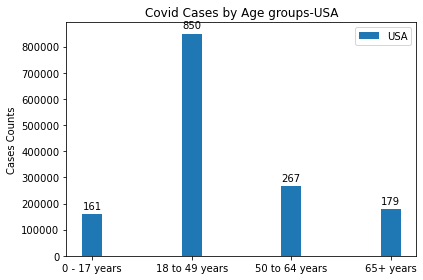

In [66]:
labels =age_summary_data['age_group']
USA = age_summary_data['Count_of_Cases_USA']

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , USA, width, label='USA')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases Counts')
ax.set_title('Covid Cases by Age groups-USA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ht=(round(height/1000))
        ax.annotate('{}'.format(ht),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

### Analyzing the Deaths by Age Groups

In [70]:
df2['death_yn'].value_counts()
# this is a significant number of missing values. 

No         767708
Missing    713387
Yes         16539
Name: death_yn, dtype: int64

In [72]:
df2['death_yn'].astype('string')

54         No
55         No
56         No
57         No
58         No
           ..
1999930    No
1999931    No
1999932    No
1999933    No
1999934    No
Name: death_yn, Length: 1497634, dtype: string

In [77]:
#Since I'm going to analyse the gender details by recorded deth records, I'm selecting only accurately recoderded data.
death_data=df2.loc[df2['death_yn']=='Yes']
death_data

,case_month,res_state,age_group,sex,death_yn
4046,2020-03,VA,Missing,Missing,Yes
4047,2020-03,VA,Missing,Missing,Yes
4048,2020-03,VA,Missing,Missing,Yes
4049,2020-03,VA,Missing,Missing,Yes
4050,2020-03,VA,Missing,Missing,Yes
...,...,...,...,...,...
1959197,2020-04,NY,18 to 49 years,Female,Yes
1959198,2020-04,NY,18 to 49 years,Female,Yes
1959199,2020-04,NY,18 to 49 years,Female,Yes
1959200,2020-04,NY,18 to 49 years,Female,Yes


In [82]:
death_df=death_data[['age_group','res_state']]
death_df

,age_group,res_state
4046,Missing,VA
4047,Missing,VA
4048,Missing,VA
4049,Missing,VA
4050,Missing,VA
...,...,...
1959197,18 to 49 years,NY
1959198,18 to 49 years,NY
1959199,18 to 49 years,NY
1959200,18 to 49 years,NY


In [98]:
death_sum_df=death_df.groupby(death_df['age_group']).count()
death_sum_data=death_sum_df.rename(columns={'res_state':'Count_of_Deaths'})
death_sum_data.reset_index(level=0, inplace=True)
death_sum_data

,age_group,Count_of_Deaths
0,18 to 49 years,385
1,50 to 64 years,977
2,65+ years,15131
3,Missing,46


In [100]:
# missing values are significanly low. So the data is dropped.
age_death_summary=death_sum_data.drop(index=3)
age_death_summary

,age_group,Count_of_Deaths
0,18 to 49 years,385
1,50 to 64 years,977
2,65+ years,15131


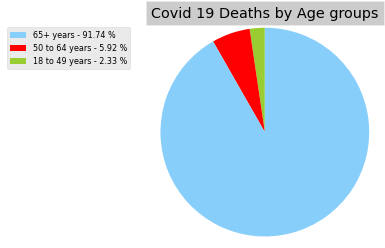

In [176]:
x = age_death_summary['age_group']
y = age_death_summary['Count_of_Deaths']
colors = ['yellowgreen','red','lightskyblue']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title('Covid 19 Deaths by Age groups', bbox={'facecolor':'0.8', 'pad':5})

plt.savefig('piechart.png', bbox_inches='tight')

### Analyzing the Cases by Gender

In [113]:
gender_data=df2[['res_state','sex']]
gender_data

,res_state,sex
54,AK,Missing
55,AK,Missing
56,AK,Missing
57,AK,Missing
58,AK,Missing
...,...,...
1999930,PA,Female
1999931,PA,Female
1999932,PA,Female
1999933,PA,Female


In [114]:
sum_gender_data=gender_data.groupby(['sex']).count()

In [116]:
all_gender=sum_gender_data.rename(columns={'res_state':'Count_of_Cases_USA'})
all_gender

,Count_of_Cases_USA
sex,
Female,820223
Male,581179
Missing,96232


In [117]:
CA_gender_data=gender_data.loc[gender_data['res_state']=='CA']
CA_gender_data

,res_state,sex
618,CA,Missing
619,CA,Missing
620,CA,Missing
621,CA,Missing
622,CA,Missing
...,...,...
1990414,CA,Female
1990415,CA,Female
1990416,CA,Female
1990417,CA,Female


In [118]:
CA_sum_gender_data=CA_gender_data.groupby(['sex']).count()
CA_sum_gender_data

,res_state
sex,
Female,168696
Male,106170
Missing,5173


In [127]:
CA_gender=CA_sum_gender_data.rename(columns={'res_state':'Count_of_Cases_CA'})

In [128]:
NY_gender_data=gender_data.loc[gender_data['res_state']=='NY']


In [129]:
NY_sum_gender_data=NY_gender_data.groupby(['sex']).count()


In [130]:
NY_gender=NY_sum_gender_data.rename(columns={'res_state':'Count_of_Cases_NY'})

In [131]:
FL_gender_data=gender_data.loc[gender_data['res_state']=='FL']


In [132]:
FL_sum_gender_data=FL_gender_data.groupby(['sex']).count()


In [133]:
FL_gender=FL_sum_gender_data.rename(columns={'res_state':'Count_of_Cases_FL'})

In [134]:
IL_gender_data=gender_data.loc[gender_data['res_state']=='IL']


In [135]:
IL_sum_gender_data=IL_gender_data.groupby(['sex']).count()


In [136]:
IL_gender=IL_sum_gender_data.rename(columns={'res_state':'Count_of_Cases_IL'})

In [137]:
PA_gender_data=gender_data.loc[gender_data['res_state']=='PA']


In [138]:
PA_sum_gender_data=PA_gender_data.groupby(['sex']).count()


In [139]:
PA_gender=PA_sum_gender_data.rename(columns={'res_state':'Count_of_Cases_PA'})

In [142]:
gender_merge1=pd.merge(all_gender,CA_gender,on='sex',how='inner')


In [143]:
gender_merge2=pd.merge(NY_gender,FL_gender,on='sex',how='inner')


In [144]:
gender_merge3=pd.merge(PA_gender,IL_gender,on='sex',how='inner')


In [149]:
gender_merge4=pd.merge(gender_merge1,gender_merge2, on='sex',how='inner')
gender_summary_data=pd.merge(gender_merge4,gender_merge3, on='sex', how='inner')
gender_summary_data.reset_index(level=0, inplace=True)
gender_summary_data

,sex,Count_of_Cases_USA,Count_of_Cases_CA,Count_of_Cases_NY,Count_of_Cases_FL,Count_of_Cases_PA,Count_of_Cases_IL
0,Female,820223,168696,60106,47381,33781,45996
1,Male,581179,106170,47003,32994,25536,43691
2,Missing,96232,5173,3432,2412,2697,5887


In [150]:
# missing values are significanly low. So the data is dropped.
#gender_summary_data=gender_summary.drop(index=4)
#gender_summary_data

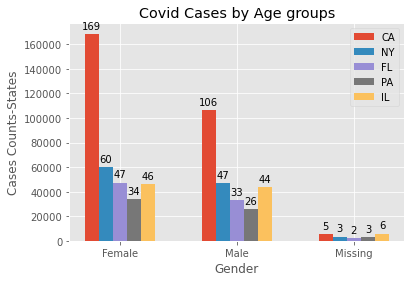

In [156]:
labels =gender_summary_data['sex']
CA =gender_summary_data['Count_of_Cases_CA']
NY=gender_summary_data['Count_of_Cases_NY']
FL=gender_summary_data['Count_of_Cases_FL']
PA=gender_summary_data['Count_of_Cases_PA']
IL=gender_summary_data['Count_of_Cases_IL']

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x , CA, width, label='CA')
rects2 = ax.bar(x+ width, NY, width, label='NY')
rects3 = ax.bar(x + width*2, FL, width, label='FL')
rects4 = ax.bar(x + width*3, PA, width, label='PA')
rects5 = ax.bar(x + width*4, IL, width, label='IL')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases Counts-States')
ax.set_xlabel('Gender')
ax.set_title('Covid Cases by Age groups')
ax.set_xticks(x+width*2)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ht=(round(height/1000))
        ax.annotate('{}'.format(ht),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)


#fig.tight_layout()

plt.show()

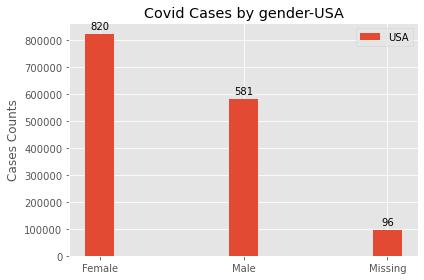

In [157]:
labels =gender_summary_data['sex']
USA = gender_summary_data['Count_of_Cases_USA']

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , USA, width, label='USA')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases Counts')
ax.set_title('Covid Cases by gender-USA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ht=(round(height/1000))
        ax.annotate('{}'.format(ht),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

### Analyzing the Deaths by Gender

In [158]:
death_gender_df=death_data[['sex','res_state']]
death_gender_df

,sex,res_state
4046,Missing,VA
4047,Missing,VA
4048,Missing,VA
4049,Missing,VA
4050,Missing,VA
...,...,...
1959197,Female,NY
1959198,Female,NY
1959199,Female,NY
1959200,Female,NY


In [160]:
death_gender_sum_df=death_gender_df.groupby(death_gender_df['sex']).count()
death_gender_sum_df=death_gender_sum_df.rename(columns={'res_state':'Count_of_Deaths'})
death_gender_sum_df.reset_index(level=0, inplace=True)
death_gender_sum_df

,sex,Count_of_Deaths
0,Female,9110
1,Male,7278
2,Missing,151


In [166]:
# missing values are significanly low. So the data is dropped.
gender_death_summary=death_gender_sum_df.drop(index=2)
gender_death_summary

,sex,Count_of_Deaths
0,Female,9110
1,Male,7278


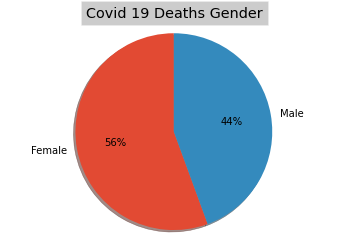

In [167]:
# showing the data in a pie chart as we need to visualize this as a ratio
labels = ['Female', 'Male']
sizes = [9110, 7278]
explode = (0, 0)

fig1, ax1 = plt.subplots()
#ax1.title('Covid Deaths by Gender')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Covid 19 Deaths Gender', bbox={'facecolor':'0.8', 'pad':5})
plt.show()